In [1]:
import astropy

In [2]:
from astropy.table import Table

In [19]:
headers = ['Index', 'Name', 'tag', '$q$', '$a_{1x}$', '$a_{1y}$', '$a_{1z}$', '$a_{2x}$', '$a_{2y}$', '$a_{2z}$', '$L_x$', '$L_y$', '$L_z$', 'mf', 'af', 'mW']
t = Table.read('../data/GT_CATALOG_TABLE.txt', format="ascii", names=headers)

In [20]:
t

Index,Name,tag,$q$,$a_{1x}$,$a_{1y}$,$a_{1z}$,$a_{2x}$,$a_{2y}$,$a_{2z}$,$L_x$,$L_y$,$L_z$,mf,af,mW
int64,str6,str44,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
1,GT0001,fr_b3.1_a0.4_oth.000_M77,1.0,0.0,0.0,0.3999,-0.4001,0.0,0.0,0,0.0,0.8261,nan,nan,0.09957
2,GT0002,fr_b3.1_a0.4_oth.045_M77,1.0,0.2828,0.0,0.2828,-0.4001,0.0,0.0,0,0.0,0.8323,nan,nan,0.1001
3,GT0003,fr_b3.1_a0.4_oth.090_M77,1.0,0.4,0.0,2.449e-17,-0.4,0.0,0.0,0,0.0,0.8467,nan,nan,0.1012
4,GT0004,fr_b3.1_a0.4_oth.135_M77,1.0,-0.3999,0.0,0.0,0.2829,0.0,-0.2829,0,0.0,-0.8608,nan,nan,0.1025
5,GT0005,fr_b3.1_a0.4_oth.180_M77,1.0,-0.3999,0.0,0.0,4.9e-17,0.0,-0.4001,0,0.0,-0.8664,nan,nan,0.103
6,GT0006,fr_b3.1_a0.4_oth.225_M77,1.0,-0.3999,0.0,0.0,-0.2829,0.0,-0.2829,0,0.0,-0.8602,nan,nan,0.1022
7,GT0007,fr_b3.1_a0.4_oth.270_M77,1.0,-0.4,0.0,-7.348e-17,-0.4,0.0,0.0,0,0.0,0.8458,nan,nan,0.1008
8,GT0008,fr_b3.1_a0.4_oth.315_M77,1.0,-0.2828,0.0,0.2828,-0.4001,0.0,0.0,0,0.0,0.8316,nan,nan,0.09983
9,GT0009,fr_b3.1_a0.2_oth.000_M77,1.0,0.0,0.0,0.2,-0.2,0.0,0.0,0,0.0,0.8362,nan,nan,0.1004


In [21]:
import pandas

In [22]:
import heron

In [23]:
from heron import corner

In [25]:
import matplotlib.pyplot as plt

In [27]:
t['$q$'].values

AttributeError: 'Column' object has no attribute 'values'

In [74]:
from scipy.stats import gaussian_kde
import numpy as np

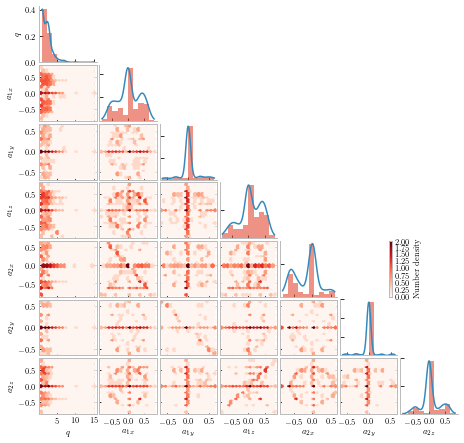

In [84]:
figsize = (7.5,7.5)
colnames = t.colnames
colnames = ['$q$', '$a_{1x}$', '$a_{1y}$', '$a_{1z}$', '$a_{2x}$', '$a_{2y}$', '$a_{2z}$',]
f, ax = plt.subplots(len(colnames),len(colnames),figsize=figsize)
#yvalues = data_object.denormalise(data_object.labels, "label")

plt.style.use("/home/daniel/papers/thesis/thesis-style.mpl")
for i, xcol in enumerate(colnames):
    for j, ycol in enumerate(colnames):   

        if not i==len(colnames)-1:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel(colnames[j])
        if not j==0: 
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel(colnames[i])
        if j>i: 
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['bottom'].set_visible(False)
            ax[i,j].spines['left'].set_visible(False)
            ax[i,j].spines['right'].set_visible(False)
            ax[i,j].grid(False)
            ax[i,j].yaxis.set_ticks_position('none')
            ax[i,j].xaxis.set_ticks_position('none')
            continue


        if i == j:
            ax[i,j]
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['right'].set_visible(False)
            ax[i,j].grid(False)
            ax[i,j].yaxis.set_ticks_position('left')
            ax[i,j].xaxis.set_ticks_position('bottom')
            n, bins, rectangles = ax[i,j].hist(t[xcol], normed=True,alpha=0.6)
            #try:
            kernel = gaussian_kde(t[xcol].T)
            positions = np.linspace(t[xcol].min(), t[xcol].max(), 100)
            ax[i,j].plot(positions, n.max()*kernel(positions)/kernel(positions).max())


            continue
        #ax[i,j].set_xlim([data[:,i].min(), data[:,i].max()])
        #ax[i,j].set_ylim([data[:,j].min(), data[:,j].max()])   
        #ax[i,j].plot(t[ycol], t[xcol], '.')
        hexes = ax[i,j].hexbin(t[ycol], t[xcol], gridsize=15, cmap="Reds", bins='log', vmin=0, vmax=2)

f.subplots_adjust(wspace=0.05, hspace=0.05)
#cb = f.colorbar(ax[2,3], cax = ax[4,5]) 
cbar = f.colorbar(hexes, ax = ax[4,5], orientation="vertical")
cbar.set_label("Number density")
f.savefig("/home/daniel/papers/thesis/figures/georgiatech-density-plot.pdf")

In [35]:
%matplotlib inline